In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset=pd.read_csv("World Energy Consumption.csv")

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 128 entries, country to wind_share_energy
dtypes: float64(126), object(2)
memory usage: 21.5+ MB


In [15]:
dataset.head(5)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [17]:
dataset.shape

(22012, 129)

In [19]:
dataset.dtypes

country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object

In [21]:
dataset_columns = ["country","population","gdp"]  
for i in dataset_columns:
    print(f"{i}: {dataset[i].dtype}")

country: object
population: float64
gdp: float64


In [23]:
missing = dataset.isnull().sum()

missing[missing > 0].sort_values(ascending=False).head()

biofuel_cons_change_pct    20265
solar_cons_change_pct      19888
biofuel_cons_per_capita    19710
wind_cons_change_pct       19599
nuclear_cons_change_pct    19545
dtype: int64

In [25]:
dataset.drop("year",axis=1,inplace=True)
dataset.head(5)

,country,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.06,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.69,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.57,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [27]:
dataset.isnull().sum()

country                        0
iso_code                    5500
population                  3889
gdp                        10899
biofuel_cons_change_pct    20265
                           ...  
wind_elec_per_capita       14947
wind_electricity           14016
wind_energy_per_capita     17947
wind_share_elec            15126
wind_share_energy          17911
Length: 128, dtype: int64

In [37]:
dataset.describe()

,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,2671.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
mean,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,10.966685,1.954035,0.419787,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,47.953561,5.274155,0.816879,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,0.010000,0.062000,0.056000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,0.690000,1.577500,0.561000,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000
max,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,677.570000,71.429000,7.486000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3219.852000,2139.230000,8422.012000,56.840000,26.157000


In [49]:
dataset=pd.read_csv("World Energy Consumption.csv")

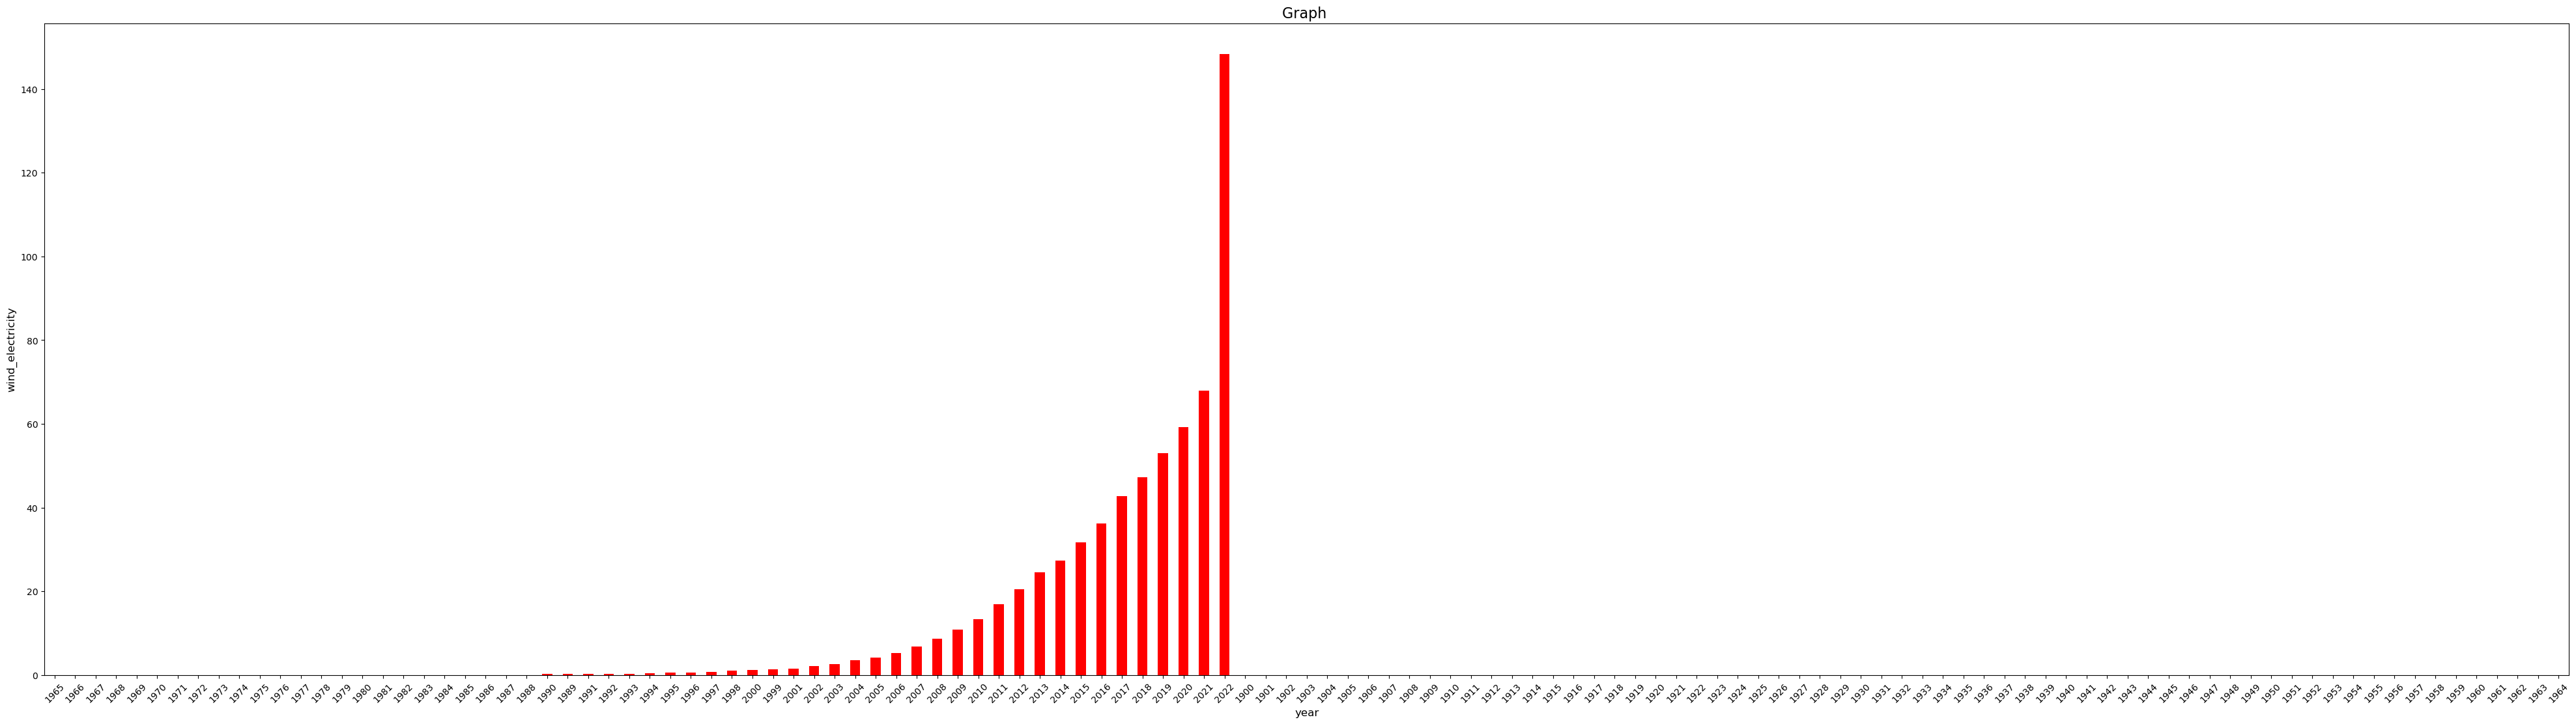

In [53]:
mean_dataset = dataset.groupby("year")["wind_electricity"].mean().sort_values()

plt.figure(figsize=(50, 13))
mean_dataset.plot(kind="bar", color="red")
plt.title("Graph ", fontsize=16)
plt.xlabel("year", fontsize=12)
plt.ylabel("wind_electricity", fontsize=12)
plt.xticks(rotation=45)
plt.show()


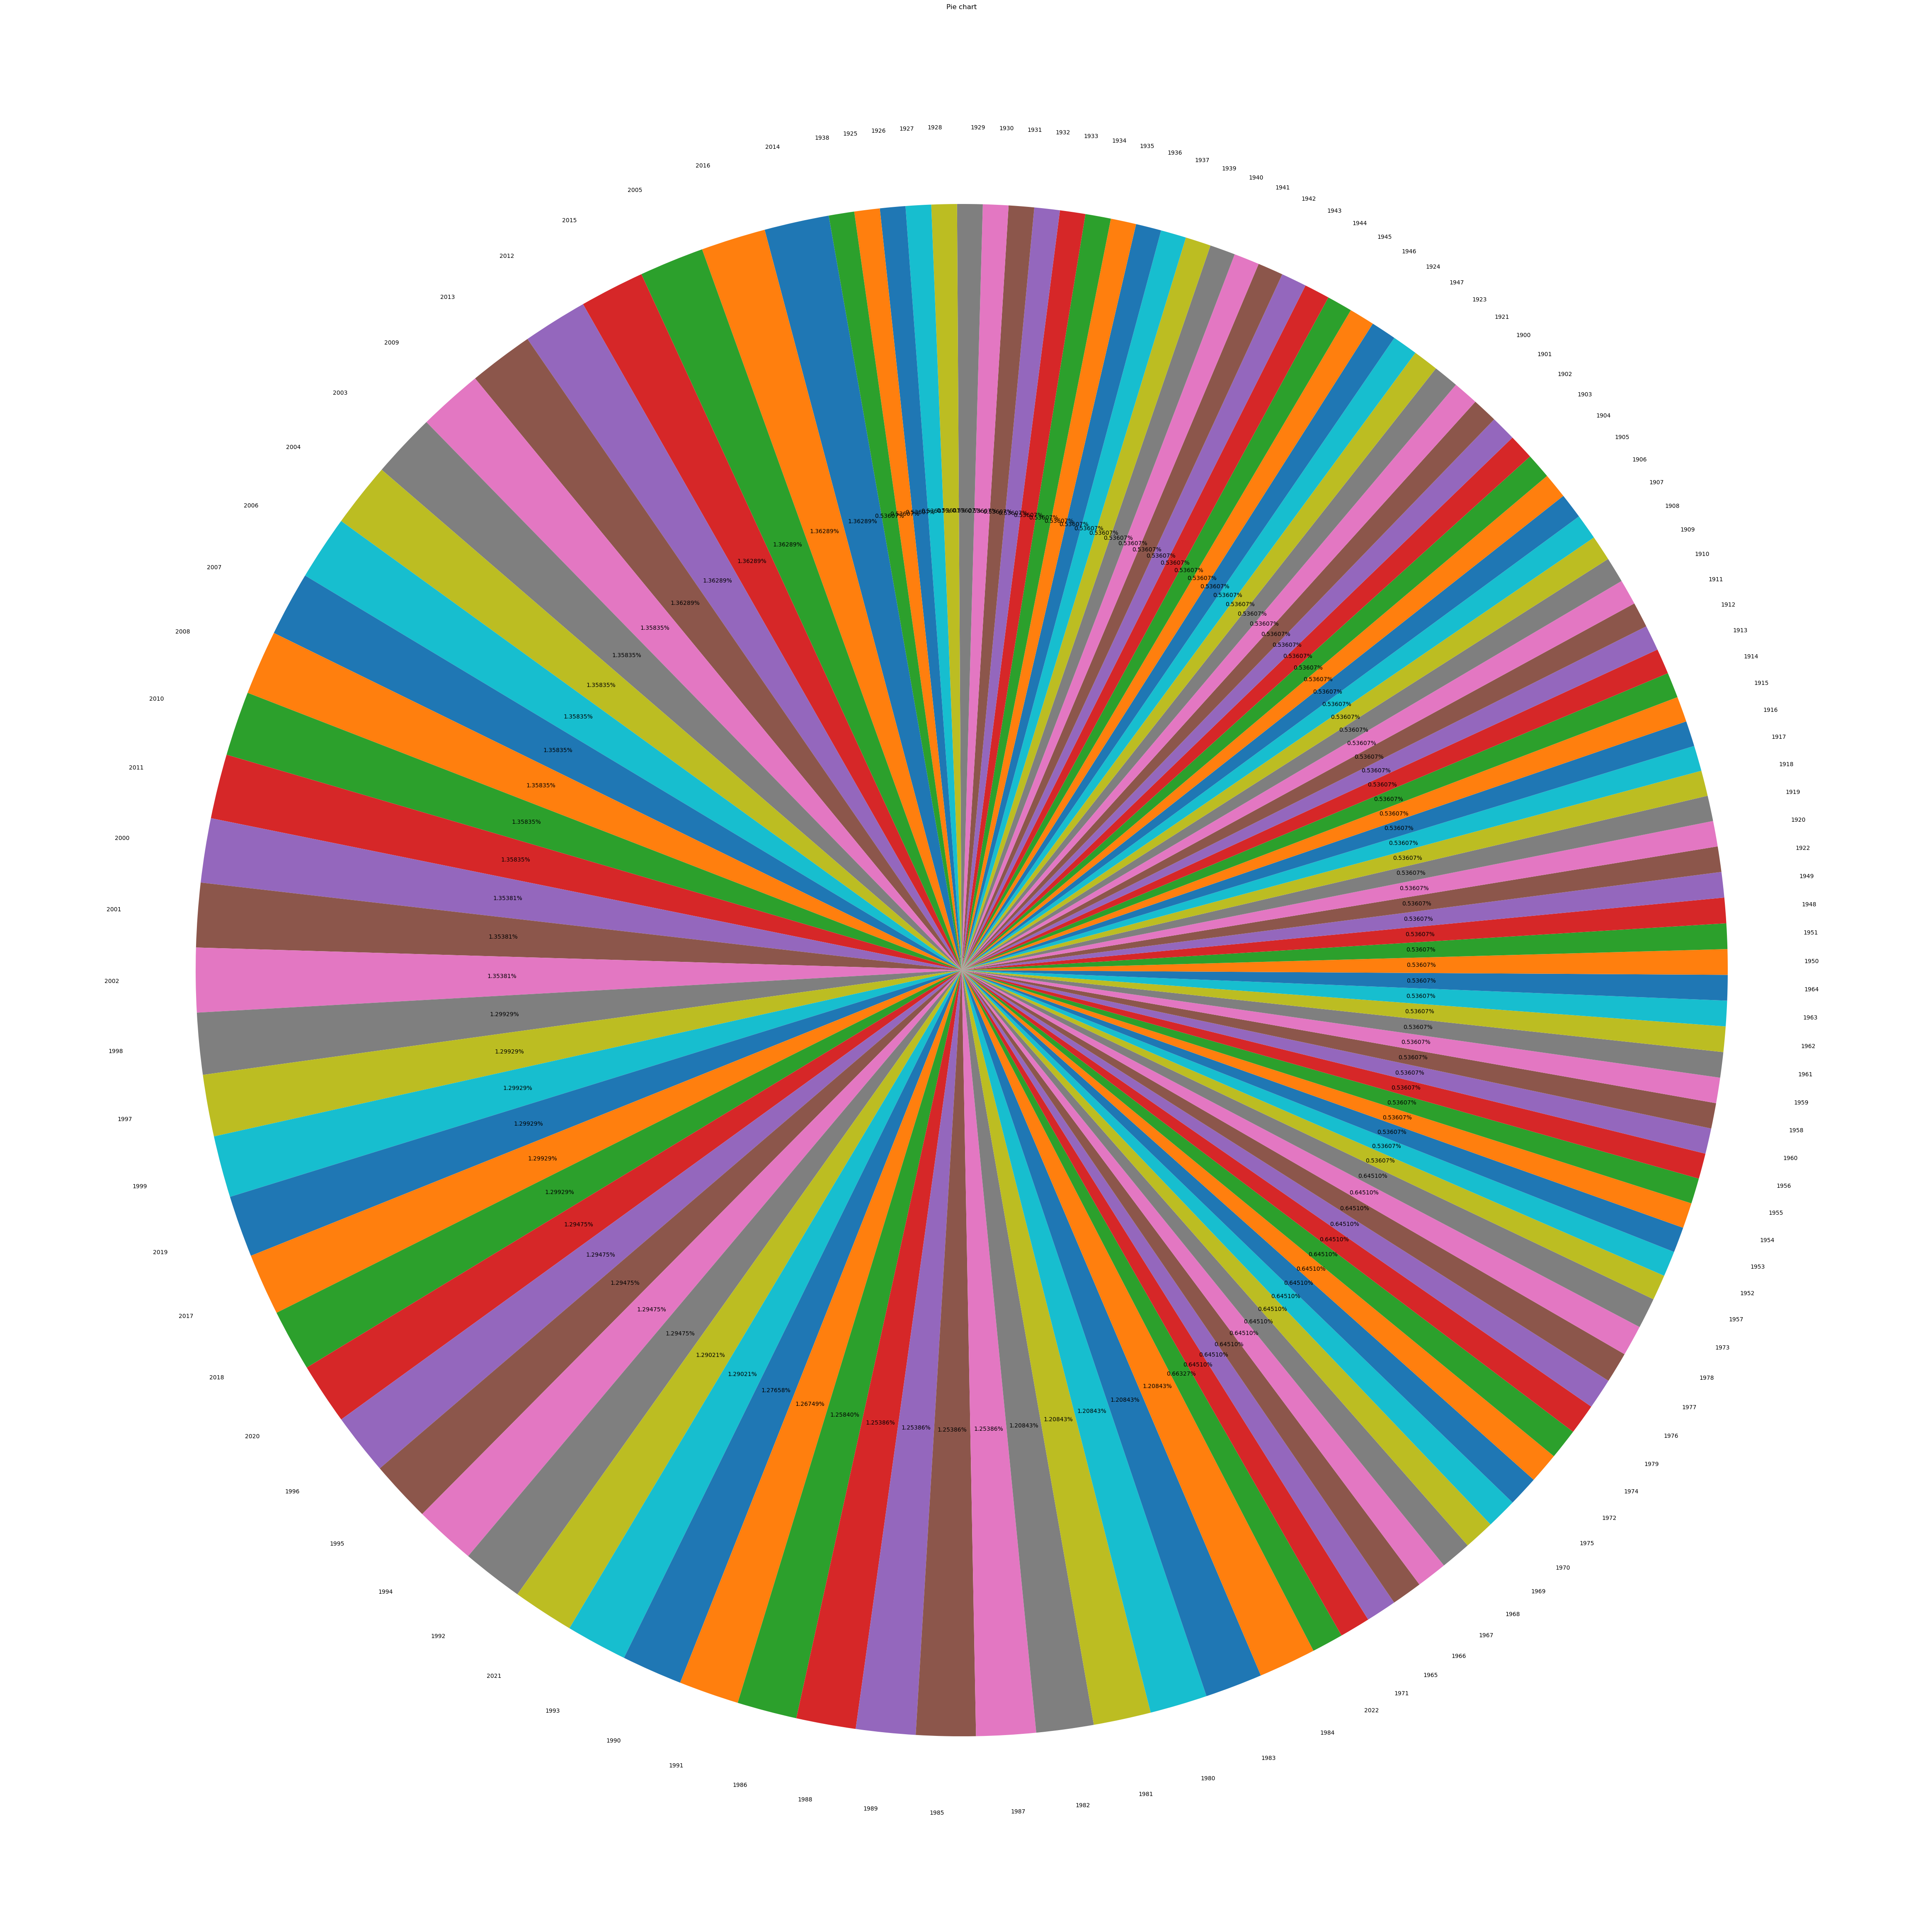

In [61]:
Gender_counts = dataset['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(400, 60))  # Adjust figure size if needed
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.5f%%', startangle=100)
plt.title('Pie chart')
plt.show()